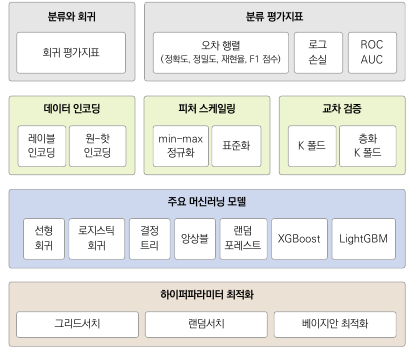

회귀의 평가지표

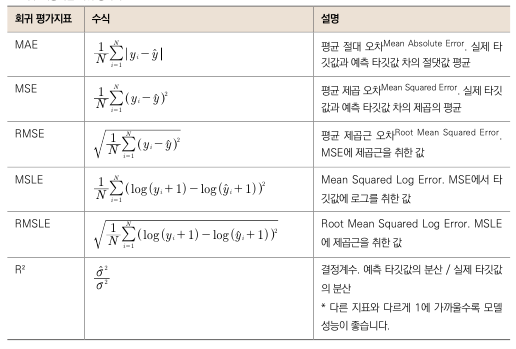

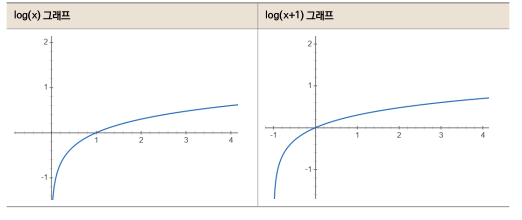

In [3]:
# 평가지표
import numpy as np
from sklearn.metrics import mean_absolute_error, mean_squared_error,mean_squared_log_error,r2_score
true = np.random.randint(0,3,10)
pred = np.random.randint(0,3,10)
print(true,pred)
MAE = mean_absolute_error(true,pred)
MSE = mean_squared_error(true,pred)
RMSE = np.sqrt(MSE)
MSLE = mean_squared_log_error(true,pred)
RMSLE = np.sqrt(MSLE)
R2 = r2_score(true,pred)
MAE,MSE,RMSE,MSLE,RMSLE,R2

[2 0 1 0 1 0 1 2 0 2] [2 2 1 2 1 0 1 0 0 2]


(0.6,
 1.2,
 1.0954451150103321,
 0.3620846882437745,
 0.6017347324559008,
 -0.7391304347826084)

상관계수
  - 피어슨 상관계수

  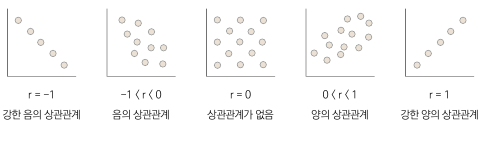

분류 평가지표
  - 오차행렬, 로그손실, ROC / AUC

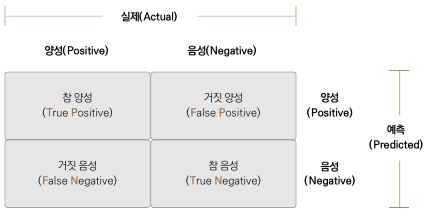

  - 정확도
    - 전체값중에 TP TN이 차지하는 비율
    - 평가지표로 잘 사용하지 않는 추세
  - 정밀도
    - 양성 예측의 정확도 (TP) / (TP+FP)
    - 스펨메일 필터링 (스펨은 양성, 일반은 음성)
    - 스펨을 일반으로 판단하는 것보다 일반을 스펨으로 판단하는게 더 문제
  - 재현율
    - 실제 양성(TP+FN)중 양성으로 잘 예측한 값(TP)의 비율
    - 민감도 또는 양성비율 이라고 함
    - 양성을 음성으로 잘못 판단하면 문제가 되는 경우
    - 암(양성)인데 암이 아니라고(음성)진단하면 큰 문제
  - F1 점수
    - 정밀도 + 재현율
    - 불량판정...등에 사용

    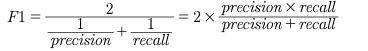




ROC
  - 참 양성비율(TPR)에 대한 거짓양성비율(FPR)의 곡선
  - TPR : 양성을 얼마나 정확히 예측하는지 나타내는 지표(재현률과 같음)
  -FPR: 음성을 얼마나 정확히 예측하는지 나타내는 지표(특이도)

AUC
  - ROC곡선 아래 면적
  - 예측값이 확률인 분류문제  


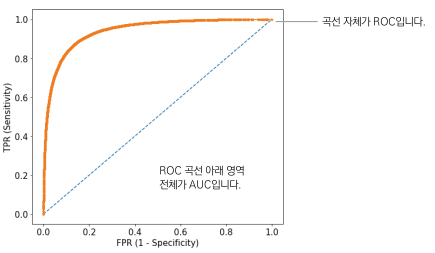

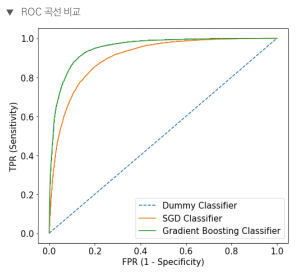

데이터 인코딩
  - 레이블 인코딩
    - 범주형 데이터를 수치화
    - 명목형 데이터를 레이블 인코딩 하면 모델 성능이 떨어지는 단점
    - 서로 까까운 숫자를 비슷한 데이터로 인식
  - 원핫인코딩
    - 고윳값이 많으면 피처의 개수가 지나치게 많이 늘어난다
    - 메모리 사용량이 폭증
    - 고윳값이 많아도 애초에 데이터가 적으면 괜찮음...

  - 범주형(명목형)데이터인데 고윳값(unique)가 많으면
    - 비슷한 것끼리 그룹화
    - 빈도가 낮은 고윳값을 etc(기타)로 처리
    - 다른 인코딩을 고려




In [7]:
from sklearn.preprocessing import LabelEncoder
temp = np.array(['a','b','c','d','a','c'])
LabelEncoder().fit_transform(temp)

array([0, 1, 2, 3, 0, 2])

In [9]:
from sklearn.preprocessing import OneHotEncoder
OneHotEncoder().fit_transform(temp.reshape(-1,1)).toarray()

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.]])

In [10]:
import pandas as pd
pd.get_dummies(temp)

,a,b,c,d
0,1,0,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,0,1
4,1,0,0,0
5,0,0,1,0


피처스케일링
  - 서로다른 피처의 값을 통일
  - 값의 범위가 다르면 모델훈련이 제대로 안됨
  - 트리기반 모델(XGBoost ,LightGBC) 필요없음
  - 트리기반은 데이터의 크기보다는 대소관계에 영향을 받는다.
  

min-max : 값의 범위를 0~1  정규화

  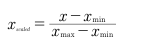

In [ ]:
from sklearn.preprocessing import MinMaxScaler
train_x = np.array([1,2,3])
text_x = np.array([5,6,7])
mms = MinMaxScaler()
# mms.fit(train_x.reshape(-1,1))
# mms.transform(train_x.reshape(-1,1))
# # mms.fit(text_x.reshape(-1,1))   # 이렇게 하면 안됨..
# mms.transform(text_x.reshape(-1,1))

mms.fit_transform(train_x.reshape(-1,1))
mms.transform(text_x.reshape(-1,1))

표준화 : 평균이0 이고 분산이 1이 되도록 값을 조정

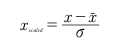


교차검증
  -  k폴드 교차검증

  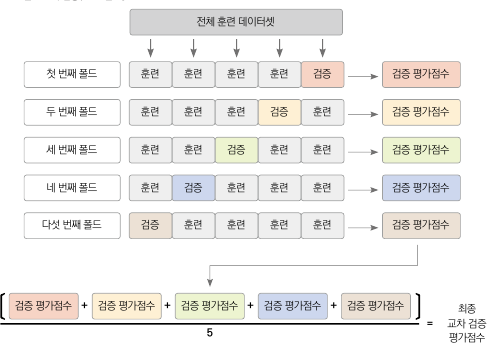

Stratified K-Fold Cross VAlidation : 층화 k폴드 교차 검증

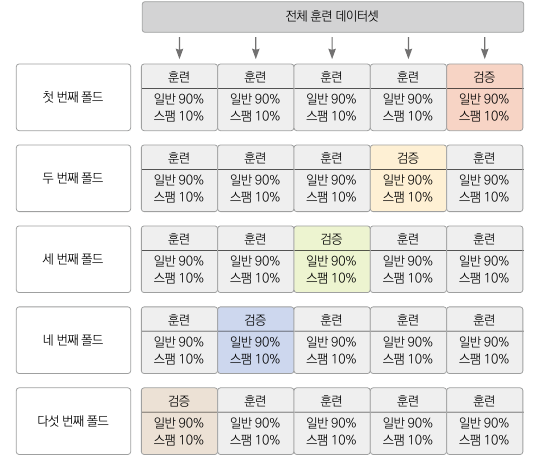

In [14]:
from sklearn.model_selection import StratifiedKFold

주요 머신 러닝 모델
  - 선형회귀

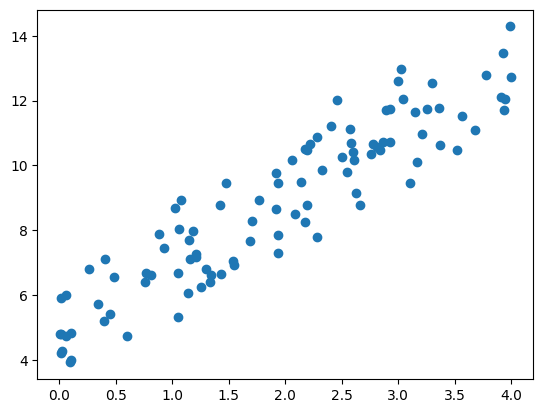

In [17]:
# y = 2x+5
import numpy as np
import matplotlib.pyplot as plt
w0 = 2
w1 =5
noise = np.random.randn(100,1)  #표준 정규분포를 따르는 데이터 100
noise

X = 4*np.random.rand(100,1)  # 0~4 사이 100
y = w0*X+w1+noise
plt.scatter(X,y)


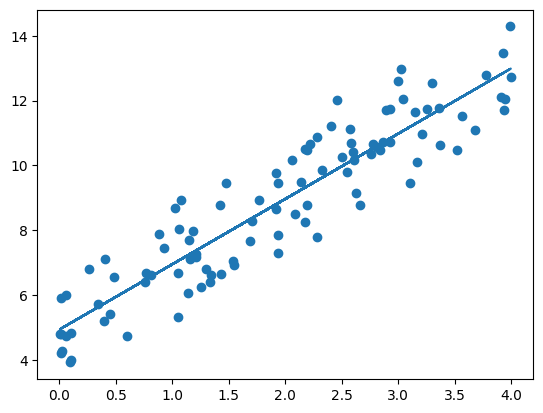

In [18]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X,y)
pred = lr.predict(X)
plt.scatter(X,y)
plt.plot(X,pred)
plt.show()

선형회귀를 응용 분류에 적용
  - 로지스틱 회귀
  - 시그모이드함수를 이용해서 확률을 예측

  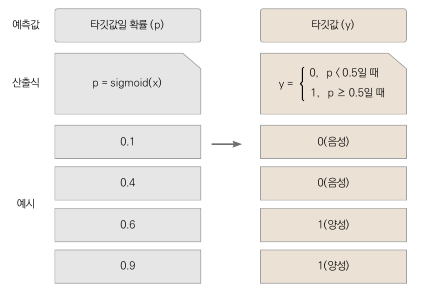

트리
  - Decison Tree
  - 분류와 회귀 모두 사용 가능

  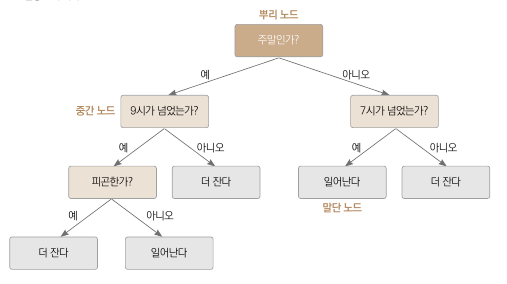

앙상블
  - 다양한 모델이 내린결과를 결합하는 기법
  - 보팅
    - 하드 보팅
    - 소프트 보팅
  - 배깅
  - 부스팅

하드보팅 : 다수결 방식

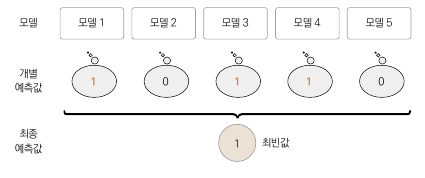

소프트 보팅 : 개별 예측확률들의 평균

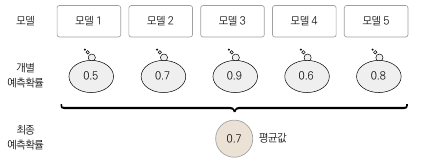

In [29]:
# 소프트 보팅이 하드보팅보다 성능이 우수

배깅
  - 개별모델이 서로다른 샘플링 데이터를 활용

  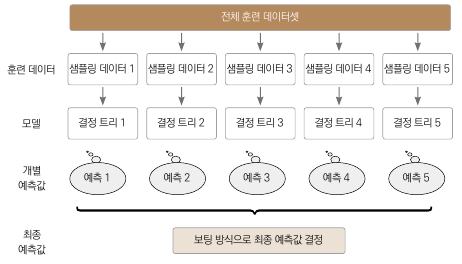

부스팅
  - 가중치를 활용해서 분류 성능이 약한 모델을 강하게 만듦

  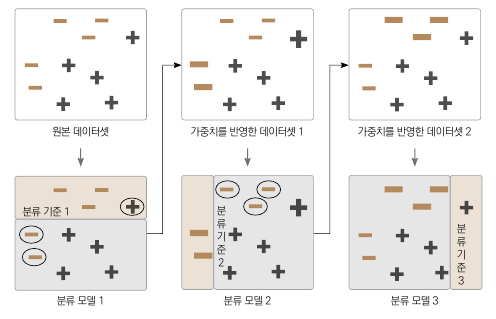

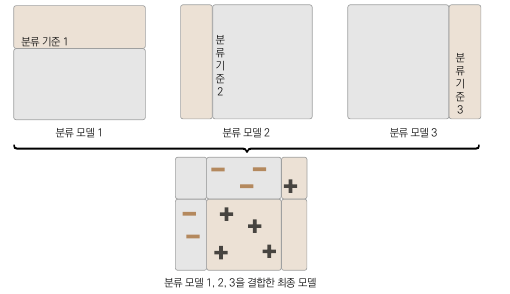

랜덤포레스트

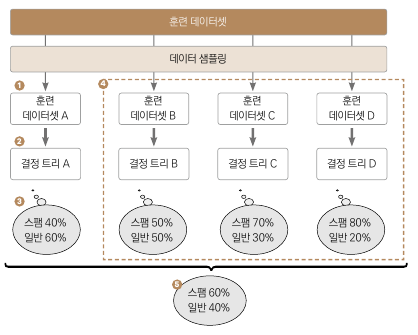

그리드서치
  - 파라메터 튜닝
  - 모든 경우의 수를 탐색
  - 시간이 오래 걸림

랜덤서치
  - 파라메터를 무작위로 탐색
  - 무작위라는 한계때문에 사용빈도는 떨어짐

베이지안 최적화
  - 사전 정보를 바탕으로 최적 하이퍼 파라메터를 확률적으로 추정해서 탐색
  - bayes_opt라는 패키지

In [32]:
!pip install bayesian-optimization

In [33]:
from bayes_opt import BayesianOptimization